All Keys: dict_keys(['name', 'age', 'roll_number', 'grade'])
All Values: dict_values(['saad', 21, 134, 'A'])

Updated Grade: A+

Added Email: {'name': 'saad', 'age': 21, 'roll_number': 134, 'grade': 'A+', 'email': 'saad@example.com'}

After deleting roll_number: {'name': 'saad', 'age': 21, 'grade': 'A+', 'email': 'saad@example.com'}


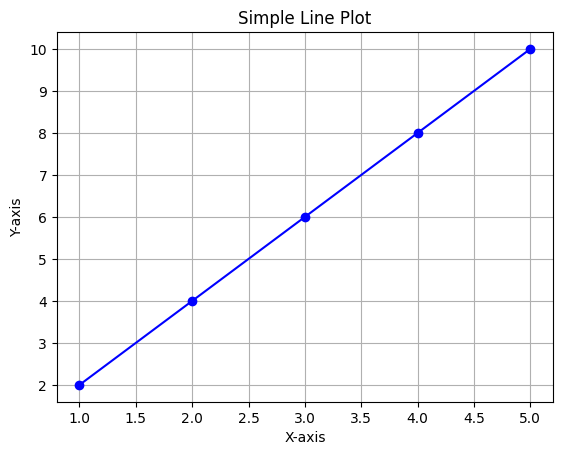


BFS Solution Path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]
Steps: 5
Time: 3e-05 seconds
Memory used: 10

DFS Solution Path: [(0, 0), (4, 0), (4, 3), (0, 3), (3, 0), (3, 3), (4, 2)]
Steps: 7
Time: 2e-05 seconds
Memory used: 7

A* Path: ['A', 'B', 'D', 'Y']


['A', 'B', 'D', 'Y']

In [8]:
# Step 1: Create a dictionary
student = {
    "name": "saad",
    "age": 21,
    "roll_number": 134,
    "grade": "A"
}

# Step 2: Print all keys and values
print("All Keys:", student.keys())
print("All Values:", student.values())

# Step 3: Update the grade
student["grade"] = "A+"
print("\nUpdated Grade:", student["grade"])

# Step 4: Add a new key 'email'
student["email"] = "saad@example.com"
print("\nAdded Email:", student)

# Step 5: Delete the 'roll_number' key
del student["roll_number"]
print("\nAfter deleting roll_number:", student)

# Task 3: Simple Line Plot

import matplotlib.pyplot as plt

# Data
X = [1, 2, 3, 4, 5]
Y = [2, 4, 6, 8, 10]

# Create Line Plot
plt.plot(X, Y, marker='o', color='blue')

# Add title and labels
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Add grid lines
plt.grid(True)

# Display the plot
plt.show()

import time
from collections import deque
import sys

# Limit recursion depth for DFS
sys.setrecursionlimit(10000)

# BFS Implementation
def water_jug_bfs(x, y, target):
    start_time = time.time()
    visited = set()
    queue = deque([(0, 0, [])])

    while queue:
        jug1, jug2, path = queue.popleft()
        if (jug1, jug2) in visited:
            continue
        visited.add((jug1, jug2))
        path = path + [(jug1, jug2)]

        if jug1 == target or jug2 == target:
            end_time = time.time()
            print("\nBFS Solution Path:", path)
            print("Steps:", len(path))
            print("Time:", round(end_time - start_time, 5), "seconds")
            print("Memory used:", len(visited))
            return

        # All possible operations
        queue.extend([
            (x, jug2, path),            # Fill Jug1
            (jug1, y, path),            # Fill Jug2
            (0, jug2, path),            # Empty Jug1
            (jug1, 0, path),            # Empty Jug2
            (max(0, jug1 - (y - jug2)), min(y, jug1 + jug2), path),  # Pour Jug1 -> Jug2
            (min(x, jug1 + jug2), max(0, jug2 - (x - jug1)), path)   # Pour Jug2 -> Jug1
        ])

# DFS Implementation
def water_jug_dfs(x, y, target):
    visited = set()
    start_time = time.time()
    path = []

    def dfs(jug1, jug2):
        if (jug1, jug2) in visited:
            return False
        visited.add((jug1, jug2))
        path.append((jug1, jug2))

        if jug1 == target or jug2 == target:
            return True

        # Try all moves
        moves = [
            (x, jug2), (jug1, y),
            (0, jug2), (jug1, 0),
            (max(0, jug1 - (y - jug2)), min(y, jug1 + jug2)),
            (min(x, jug1 + jug2), max(0, jug2 - (x - jug1)))
        ]
        for new_j1, new_j2 in moves:
            if dfs(new_j1, new_j2):
                return True
        path.pop()
        return False

    dfs(0, 0)
    end_time = time.time()
    print("\nDFS Solution Path:", path)
    print("Steps:", len(path))
    print("Time:", round(end_time - start_time, 5), "seconds")
    print("Memory used:", len(visited))

# Run Both
x, y, target = 4, 3, 2
water_jug_bfs(x, y, target)
water_jug_dfs(x, y, target)

import heapq

# A* Search Implementation
def a_star_search(graph, start, goal, heuristic):
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0

    while open_list:
        _, current = heapq.heappop(open_list)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            print("\nA* Path:", path)
            return path

        for neighbor, cost in graph[current].items():
            tentative_g = g_score[current] + cost
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score = tentative_g + heuristic[neighbor]
                heapq.heappush(open_list, (f_score, neighbor))

    print("No path found!")
    return None

# Example Maze as Graph
graph = {
    'A': {'B': 1, 'C': 3},
    'B': {'D': 1},
    'C': {'D': 1, 'E': 5},
    'D': {'Y': 2},
    'E': {'Y': 1},
    'Y': {}
}

# Heuristic values (estimated distances to goal)
heuristic = {'A': 5, 'B': 4, 'C': 2, 'D': 2, 'E': 1, 'Y': 0}

a_star_search(graph, 'A', 'Y', heuristic)